In [1]:
import pandas as pd
from pandas.tseries.offsets import DateOffset
import numpy as np
import yfinance as yf
from finta import TA
import hvplot.pandas
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
#Get Nasdaq 100(^NDX) for 1m and 5m from yahoo finance for 7day and 60day.
nasdaq100_5m_df = yf.download(tickers='^NDX', period='60d', interval='5m')
nasdaq100_1m_df = yf.download(tickers='^NDX', period='7d', interval='1m')

display(nasdaq100_5m_df)
display(nasdaq100_1m_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open          High           Low  \
Datetime                                                              
2021-10-20 09:30:00-04:00  15447.140625  15447.140625  15430.344727   
2021-10-20 09:35:00-04:00  15430.872070  15440.646484  15419.535156   
2021-10-20 09:40:00-04:00  15439.060547  15445.994141  15427.324219   
2021-10-20 09:45:00-04:00  15433.909180  15445.759766  15432.356445   
2021-10-20 09:50:00-04:00  15448.306641  15448.306641  15413.457031   
...                                 ...           ...           ...   
2022-01-13 15:40:00-05:00  15547.905273  15558.051758  15542.655273   
2022-01-13 15:45:00-05:00  15544.067383  15551.979492  15520.428711   
2022-01-13 15:50:00-05:00  15508.531250  15517.946289  15474.095703   
2022-01-13 15:55:00-05:00  15474.574219  15510.327148  15468.484375   
2022-01-13 16:00:00-05:00  15495.617188  15495.617188  15495.617188   

                                  Close     Adj Close    Volume  
Datetime                                                         
2021-10-20 09:30:00-04:00  15430.344727  15430.344727         0  
2021-10-20 09:35:00-04:00  15440.298828  15440.298828  13035128  
2021-10-20 09:40:00-04:00  15433.166016  15433.166016  11412551  
2021-10-20 09:45:00-04:00  15445.759766  15445.759766   9678253  
2021-10-20 09:50:00-04:00  15413.457031  15413.457031   9713852  
...                                 ...           ...       ...  
2022-01-13 15:40:00-05:00  15546.765625  15546.765625  11487783  
2022-01-13 15:45:00-05:00  15523.091797  15523.091797  10777393  
2022-01-13 15:50:00-05:00  15474.599609  15474.599609  25328738  
2022-01-13 15:55:00-05:00  15504.688477  15504.688477  36323279  
2022-01-13 16:00:00-05:00  15495.617188  15495.617188         0  

[4646 rows x 6 columns]

Open          High           Low  \
Datetime                                                              
2022-01-05 09:30:00-05:00  16192.896484  16197.230469  16189.539062   
2022-01-05 09:31:00-05:00  16192.442383  16211.084961  16187.587891   
2022-01-05 09:32:00-05:00  16176.229492  16176.229492  16134.167969   
2022-01-05 09:33:00-05:00  16143.023438  16143.023438  16130.975586   
2022-01-05 09:34:00-05:00  16136.174805  16140.867188  16129.151367   
...                                 ...           ...           ...   
2022-01-13 15:56:00-05:00  15474.063477  15501.075195  15474.063477   
2022-01-13 15:57:00-05:00  15496.257812  15510.327148  15496.257812   
2022-01-13 15:58:00-05:00  15495.618164  15500.153320  15488.155273   
2022-01-13 15:59:00-05:00  15488.232422  15504.688477  15475.842773   
2022-01-13 16:00:00-05:00  15495.617188  15495.617188  15495.617188   

                                  Close     Adj Close   Volume  
Datetime                                                        
2022-01-05 09:30:00-05:00  16189.965820  16189.965820        0  
2022-01-05 09:31:00-05:00  16187.587891  16187.587891  3145010  
2022-01-05 09:32:00-05:00  16137.688477  16137.688477  4500209  
2022-01-05 09:33:00-05:00  16136.194336  16136.194336  5075797  
2022-01-05 09:34:00-05:00  16130.004883  16130.004883  5339466  
...                                 ...           ...      ...  
2022-01-13 15:56:00-05:00  15499.881836  15499.881836  6044094  
2022-01-13 15:57:00-05:00  15500.195312  15500.195312  7126382  
2022-01-13 15:58:00-05:00  15488.849609  15488.849609  6770208  
2022-01-13 15:59:00-05:00  15504.688477  15504.688477  7396236  
2022-01-13 16:00:00-05:00  15495.617188  15495.617188        0  

[2715 rows x 6 columns]

In [43]:
nasdaq100_1d_df = yf.download(tickers='^NDX', period='MAX', interval='1d')
nasdaq100_1d_df

[*********************100%***********************]  1 of 1 completed


Open          High           Low         Close  \
Date                                                                 
1985-10-01    110.620003    112.160004    110.565002    112.139999   
1985-10-02    112.139999    112.540001    110.779999    110.824997   
1985-10-03    110.839996    111.184998    110.120003    110.870003   
1985-10-04    110.870003    110.870003    109.855003    110.074997   
1985-10-07    110.074997    110.135002    108.175003    108.199997   
...                  ...           ...           ...           ...   
2022-01-07  15774.129883  15835.000000  15526.799805  15592.190430   
2022-01-10  15383.179688  15627.919922  15165.530273  15614.429688   
2022-01-11  15582.719727  15848.559570  15496.910156  15844.120117   
2022-01-12  15955.480469  16017.389648  15815.950195  15905.099609   
2022-01-13  15970.089844  15990.379883  15468.089844  15495.620117   

               Adj Close      Volume  
Date                                  
1985-10-01    112.139999   153160000  
1985-10-02    110.824997   164640000  
1985-10-03    110.870003   147300000  
1985-10-04    110.074997   147900000  
1985-10-07    108.199997   128640000  
...                  ...         ...  
2022-01-07  15592.190430  4229270000  
2022-01-10  15614.429688  5303230000  
2022-01-11  15844.120117  4378660000  
2022-01-12  15905.099609  4321180000  
2022-01-13  15495.620117  4283070000  

[9148 rows x 6 columns]

In [3]:
period_1m = 20
period_5m = 20

In [4]:
# Use Finta to get Bolinger Bands for 1m and 5m
bbands1m_df = TA.BBANDS(nasdaq100_1m_df, period=period_1m)
bbands5m_df = TA.BBANDS(nasdaq100_5m_df, period=period_5m)

display(bbands1m_df.iloc[17:25])
display(bbands5m_df.iloc[17:25])

BB_UPPER     BB_MIDDLE      BB_LOWER
Datetime                                                           
2022-01-05 09:47:00-05:00           NaN           NaN           NaN
2022-01-05 09:48:00-05:00           NaN           NaN           NaN
2022-01-05 09:49:00-05:00  16212.664408  16168.461621  16124.258834
2022-01-05 09:50:00-05:00  16211.418981  16167.988965  16124.558948
2022-01-05 09:52:00-05:00  16217.894378  16169.546924  16121.199469
2022-01-05 09:53:00-05:00  16222.921535  16173.311230  16123.700926
2022-01-05 09:54:00-05:00  16225.389699  16176.847656  16128.305614
2022-01-05 09:55:00-05:00  16225.656665  16180.690820  16135.724976

BB_UPPER     BB_MIDDLE      BB_LOWER
Datetime                                                           
2021-10-20 10:55:00-04:00           NaN           NaN           NaN
2021-10-20 11:00:00-04:00           NaN           NaN           NaN
2021-10-20 11:05:00-04:00  15460.161378  15429.701074  15399.240770
2021-10-20 11:10:00-04:00  15460.372408  15428.693848  15397.015288
2021-10-20 11:15:00-04:00  15459.101384  15427.601172  15396.100959
2021-10-20 11:20:00-04:00  15458.512591  15427.002832  15395.493073
2021-10-20 11:25:00-04:00  15456.226497  15425.289160  15394.351823
2021-10-20 11:30:00-04:00  15456.297510  15425.192041  15394.086572

In [5]:
# Copy 1m and 5m dfs
signals_1m_df = nasdaq100_1m_df.copy()
signals_5m_df = nasdaq100_5m_df.copy()

# Concatenate the Bollinger Bands to the DataFrame
signals_1m_df = pd.concat([signals_1m_df, bbands1m_df], axis=1)
signals_5m_df = pd.concat([signals_5m_df, bbands5m_df], axis=1)

display(signals_1m_df.iloc[17:25])
display(signals_5m_df.iloc[17:25])

Open          High           Low  \
Datetime                                                              
2022-01-05 09:47:00-05:00  16187.667969  16189.695312  16172.466797   
2022-01-05 09:48:00-05:00  16172.586914  16175.072266  16167.137695   
2022-01-05 09:49:00-05:00  16175.748047  16182.226562  16175.748047   
2022-01-05 09:50:00-05:00  16177.159180  16180.512695  16170.467773   
2022-01-05 09:52:00-05:00  16209.957031  16226.066406  16206.211914   
2022-01-05 09:53:00-05:00  16218.872070  16222.746094  16212.974609   
2022-01-05 09:54:00-05:00  16209.461914  16210.485352  16206.873047   
2022-01-05 09:55:00-05:00  16206.266602  16207.194336  16194.523438   

                                  Close     Adj Close   Volume      BB_UPPER  \
Datetime                                                                       
2022-01-05 09:47:00-05:00  16174.764648  16174.764648  3572526           NaN   
2022-01-05 09:48:00-05:00  16175.072266  16175.072266  3301688           NaN   
2022-01-05 09:49:00-05:00  16180.848633  16180.848633  2825785  16212.664408   
2022-01-05 09:50:00-05:00  16180.512695  16180.512695  1227294  16211.418981   
2022-01-05 09:52:00-05:00  16218.747070  16218.747070  7011397  16217.894378   
2022-01-05 09:53:00-05:00  16212.974609  16212.974609  2945046  16222.921535   
2022-01-05 09:54:00-05:00  16206.922852  16206.922852  4297983  16225.389699   
2022-01-05 09:55:00-05:00  16206.868164  16206.868164  2580724  16225.656665   

                              BB_MIDDLE      BB_LOWER  
Datetime                                               
2022-01-05 09:47:00-05:00           NaN           NaN  
2022-01-05 09:48:00-05:00           NaN           NaN  
2022-01-05 09:49:00-05:00  16168.461621  16124.258834  
2022-01-05 09:50:00-05:00  16167.988965  16124.558948  
2022-01-05 09:52:00-05:00  16169.546924  16121.199469  
2022-01-05 09:53:00-05:00  16173.311230  16123.700926  
2022-01-05 09:54:00-05:00  16176.847656  16128.305614  
2022-01-05 09:55:00-05:00  16180.690820  16135.724976

Open          High           Low  \
Datetime                                                              
2021-10-20 10:55:00-04:00  15431.916992  15435.029297  15415.846680   
2021-10-20 11:00:00-04:00  15416.004883  15421.236328  15401.132812   
2021-10-20 11:05:00-04:00  15401.030273  15415.204102  15401.030273   
2021-10-20 11:10:00-04:00  15414.859375  15416.293945  15407.801758   
2021-10-20 11:15:00-04:00  15409.619141  15418.445312  15406.026367   
2021-10-20 11:20:00-04:00  15419.050781  15424.993164  15418.686523   
2021-10-20 11:25:00-04:00  15420.071289  15423.384766  15407.886719   
2021-10-20 11:30:00-04:00  15410.429688  15416.400391  15405.142578   

                                  Close     Adj Close   Volume      BB_UPPER  \
Datetime                                                                       
2021-10-20 10:55:00-04:00  15415.846680  15415.846680  5511329           NaN   
2021-10-20 11:00:00-04:00  15401.132812  15401.132812  5810507           NaN   
2021-10-20 11:05:00-04:00  15414.921875  15414.921875  5172149  15460.161378   
2021-10-20 11:10:00-04:00  15410.200195  15410.200195  5170436  15460.372408   
2021-10-20 11:15:00-04:00  15418.445312  15418.445312  4363811  15459.101384   
2021-10-20 11:20:00-04:00  15421.199219  15421.199219  5517956  15458.512591   
2021-10-20 11:25:00-04:00  15411.486328  15411.486328  5407099  15456.226497   
2021-10-20 11:30:00-04:00  15411.514648  15411.514648  6157414  15456.297510   

                              BB_MIDDLE      BB_LOWER  
Datetime                                               
2021-10-20 10:55:00-04:00           NaN           NaN  
2021-10-20 11:00:00-04:00           NaN           NaN  
2021-10-20 11:05:00-04:00  15429.701074  15399.240770  
2021-10-20 11:10:00-04:00  15428.693848  15397.015288  
2021-10-20 11:15:00-04:00  15427.601172  15396.100959  
2021-10-20 11:20:00-04:00  15427.002832  15395.493073  
2021-10-20 11:25:00-04:00  15425.289160  15394.351823  
2021-10-20 11:30:00-04:00  15425.192041  15394.086572

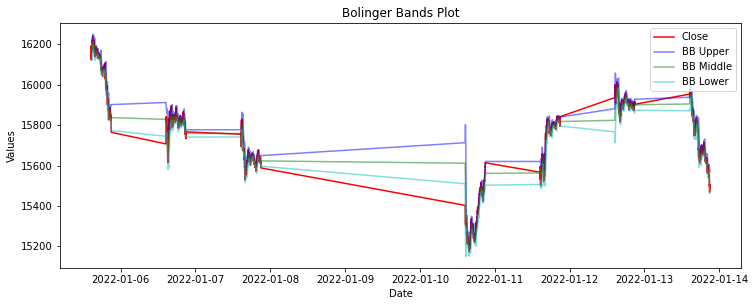

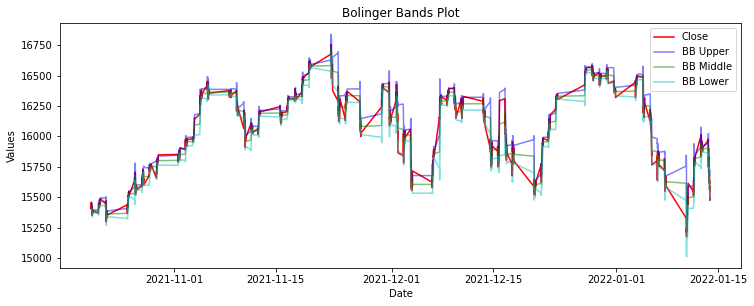

In [6]:
# Plot Bolinger Bands 
def plot_bb(df):
    plt.figure(figsize=(12.2, 4.5))
    plt.plot(df['Close'], color='r', label='Close', alpha=1)
    plt.plot(df['BB_UPPER'], color='b', label='BB Upper', alpha=0.5)
    plt.plot(df['BB_MIDDLE'], color='g', label='BB Middle', alpha=0.5)
    plt.plot(df['BB_LOWER'], color='c', label='BB Lower', alpha=0.5)
    plt.xlabel("Date")
    plt.ylabel("Values")
    plt.title("Bolinger Bands Plot")
    plt.legend(loc='upper right')
    plt.show()


plot_bb(signals_1m_df)
plot_bb(signals_5m_df)

# Create a function to calculate mfi
def money_flow_index(df, period):
    # Calculate typical_price
    typical_price = (df['Close'] + df['High'] + df['Low']) /3
    
    # Calculate the money_flow
    money_flow = typical_price * df['Volume']

    # Get all the positive and negative money_flows
    positive_flow = []
    negative_flow = []

    # Loop though the typical_price
    for i in range(1, len(typical_price)):
        if typical_price[i] > typical_price[i-1]:
            positive_flow.append(money_flow[i-1])
            negative_flow.append(0)
        elif typical_price[i] < typical_price[i-1]:
            negative_flow.append(money_flow[i-1])
            positive_flow.append(0)
        else:
            positive_flow.append(0)
            negative_flow.append(0)
            
    # Get all positive and negative money_flows within the time period
    positive_mf = []
    negative_mf = []

    for i in range(period-1, len(positive_flow)):
        positive_mf.append(sum(positive_flow[i+1 - period: i+1]))
    for i in range(period-1, len(negative_flow)):
        negative_mf.append(sum(negative_flow[i+1 - period: i+1]))
    
    # Calculate mfi
    mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf)))
    
    return mfi

In [7]:
mfi_1m_df = TA.MFI(nasdaq100_1m_df, period=period_1m)
mfi_5m_df = TA.MFI(nasdaq100_5m_df, period=period_5m)
display(mfi_1m_df)
display(mfi_5m_df)

Datetime
2022-01-05 09:30:00-05:00          NaN
2022-01-05 09:31:00-05:00          NaN
2022-01-05 09:32:00-05:00          NaN
2022-01-05 09:33:00-05:00          NaN
2022-01-05 09:34:00-05:00          NaN
                               ...    
2022-01-13 15:56:00-05:00    33.415183
2022-01-13 15:57:00-05:00    40.592256
2022-01-13 15:58:00-05:00    38.419084
2022-01-13 15:59:00-05:00    44.903621
2022-01-13 16:00:00-05:00    42.763701
Name: 20 period MFI, Length: 2715, dtype: float64

Datetime
2021-10-20 09:30:00-04:00          NaN
2021-10-20 09:35:00-04:00          NaN
2021-10-20 09:40:00-04:00          NaN
2021-10-20 09:45:00-04:00          NaN
2021-10-20 09:50:00-04:00          NaN
                               ...    
2022-01-13 15:40:00-05:00    35.096262
2022-01-13 15:45:00-05:00    30.392971
2022-01-13 15:50:00-05:00    26.571671
2022-01-13 15:55:00-05:00    41.220649
2022-01-13 16:00:00-05:00    42.221550
Name: 20 period MFI, Length: 4646, dtype: float64

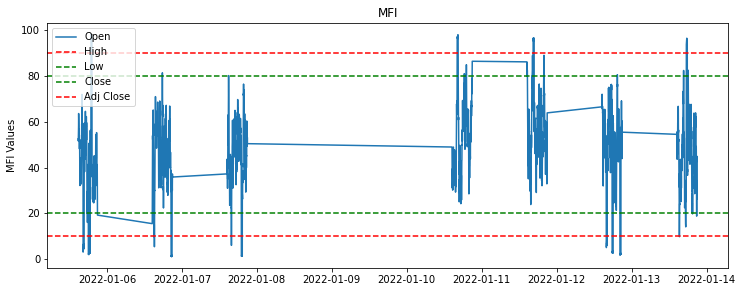

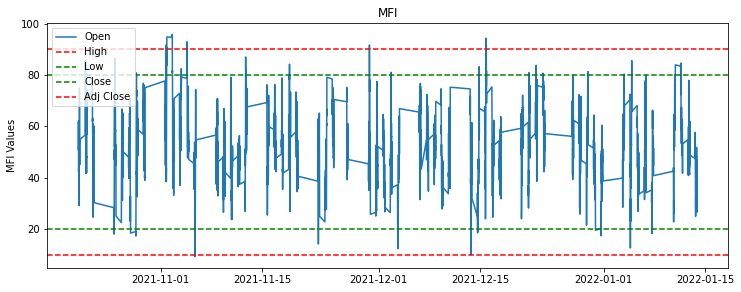

In [8]:
#Create plot
def plot_mfi(df):
    plt.figure(figsize=(12.2, 4.5))
    plt.plot(df['MFI'], label = 'MFI')
    plt.axhline(10, linestyle = '--', color = 'red')
    plt.axhline(20, linestyle = '--', color = 'green')
    plt.axhline(80, linestyle = '--', color = 'green')
    plt.axhline(90, linestyle = '--', color = 'red')
    plt.title('MFI')
    plt.ylabel('MFI Values')
    plt.legend(df.columns.values, loc='upper left')
    plt.show()

signals_1m_df['MFI'] = mfi_1m_df
signals_5m_df['MFI'] = mfi_5m_df

plot_mfi(signals_1m_df)
plot_mfi(signals_5m_df)

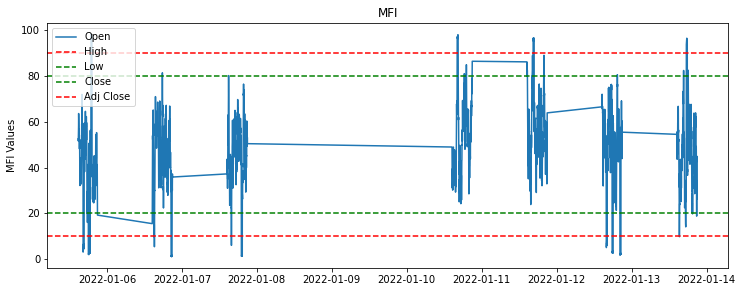

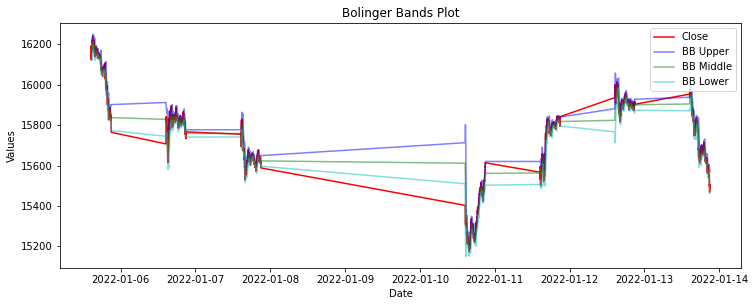

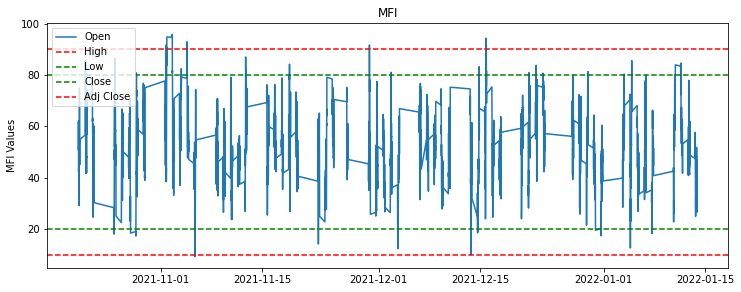

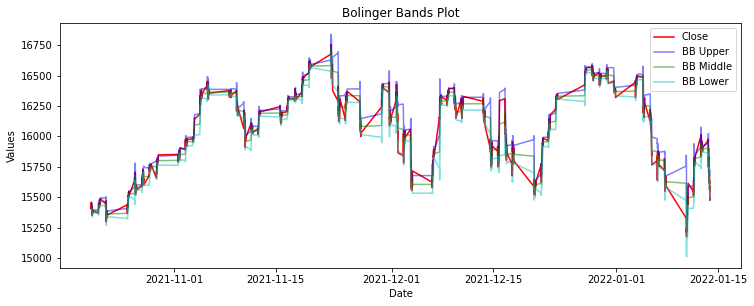

In [9]:
plot_mfi(signals_1m_df) 
plot_bb(signals_1m_df)
plot_mfi(signals_5m_df) 
plot_bb(signals_5m_df)

In [10]:
# BB signals function
def get_bb_signal(df):
    # Create a trading algorithm using Bollinger Bands
    # Set the Signal column
    df["Signal_BB"] = 0.0

    # Generate the trading signals 1 (entry) or -1 (exit) for a long 		position trading algorithm
    # where 1 is when the Close price is less than the BB_LOWER window
    # where -1 is when the Close price is greater the the BB_UPPER 		window
    for index, row in df.iterrows():
        if row["Close"] < row["BB_LOWER"]:
            df.loc[index, "Signal_BB"] = 1.0
        elif row["Close"] > row["BB_UPPER"]:
            df.loc[index,"Signal_BB"] = -1.0

In [11]:
get_bb_signal(signals_1m_df)
get_bb_signal(signals_5m_df)
display(signals_1m_df['Signal_BB'].value_counts())
display(signals_5m_df['Signal_BB'].value_counts())

 0.0    2392
 1.0     173
-1.0     150
Name: Signal_BB, dtype: int64

 0.0    4163
 1.0     252
-1.0     231
Name: Signal_BB, dtype: int64

In [12]:
def get_mfi_signal(df, high, low):
    df['Signal_MFI'] = 0.0
    for index, row in df.iterrows():
        if row['MFI'] > high:
            df.loc[index, 'Signal_MFI'] = -1
        elif row['MFI'] < low:
            df.loc[index, 'Signal_MFI'] = 1

In [13]:
get_mfi_signal(signals_1m_df, 80, 20)
get_mfi_signal(signals_5m_df, 80, 20)
display(signals_1m_df['Signal_MFI'].value_counts())
display(signals_5m_df['Signal_MFI'].value_counts())

 0.0    2417
 1.0     171
-1.0     127
Name: Signal_MFI, dtype: int64

 0.0    4431
-1.0     148
 1.0      67
Name: Signal_MFI, dtype: int64

In [57]:
def plot_signals(df):
    plt.figure(figsize=(30, 15))
    plt.plot(df['Close'], color='r', label='Close', alpha=0.5)
    plt.scatter(df.index[df['Signal_BB']==-1.0], df[df['Signal_BB']==-1.0]['Close'], color='purple', label='BB Sell', marker='v', alpha=0.75)
    #plt.scatter(df.index[df['Signal_MFI']==-1.0], df[df['Signal_MFI']==-1.0]['Close'], color='r', label='MFI Sell', marker='v', alpha=0.75)
    plt.scatter(df.index[df['Signal_BB']==1.0], df[df['Signal_BB']==1.0]['Close'], color='b', label='BB Buy',marker='^', alpha=0.75)
    #plt.scatter(df.index[df['Signal_MFI']==1.0], df[df['Signal_MFI']==1.0]['Close'], color='g', label='MFI Buy', marker='^', alpha=0.75)
    plt.xlabel("Date")
    plt.ylabel("Close Prices")
    plt.title("Signals")
    plt.legend(loc='upper right')
    plt.show()

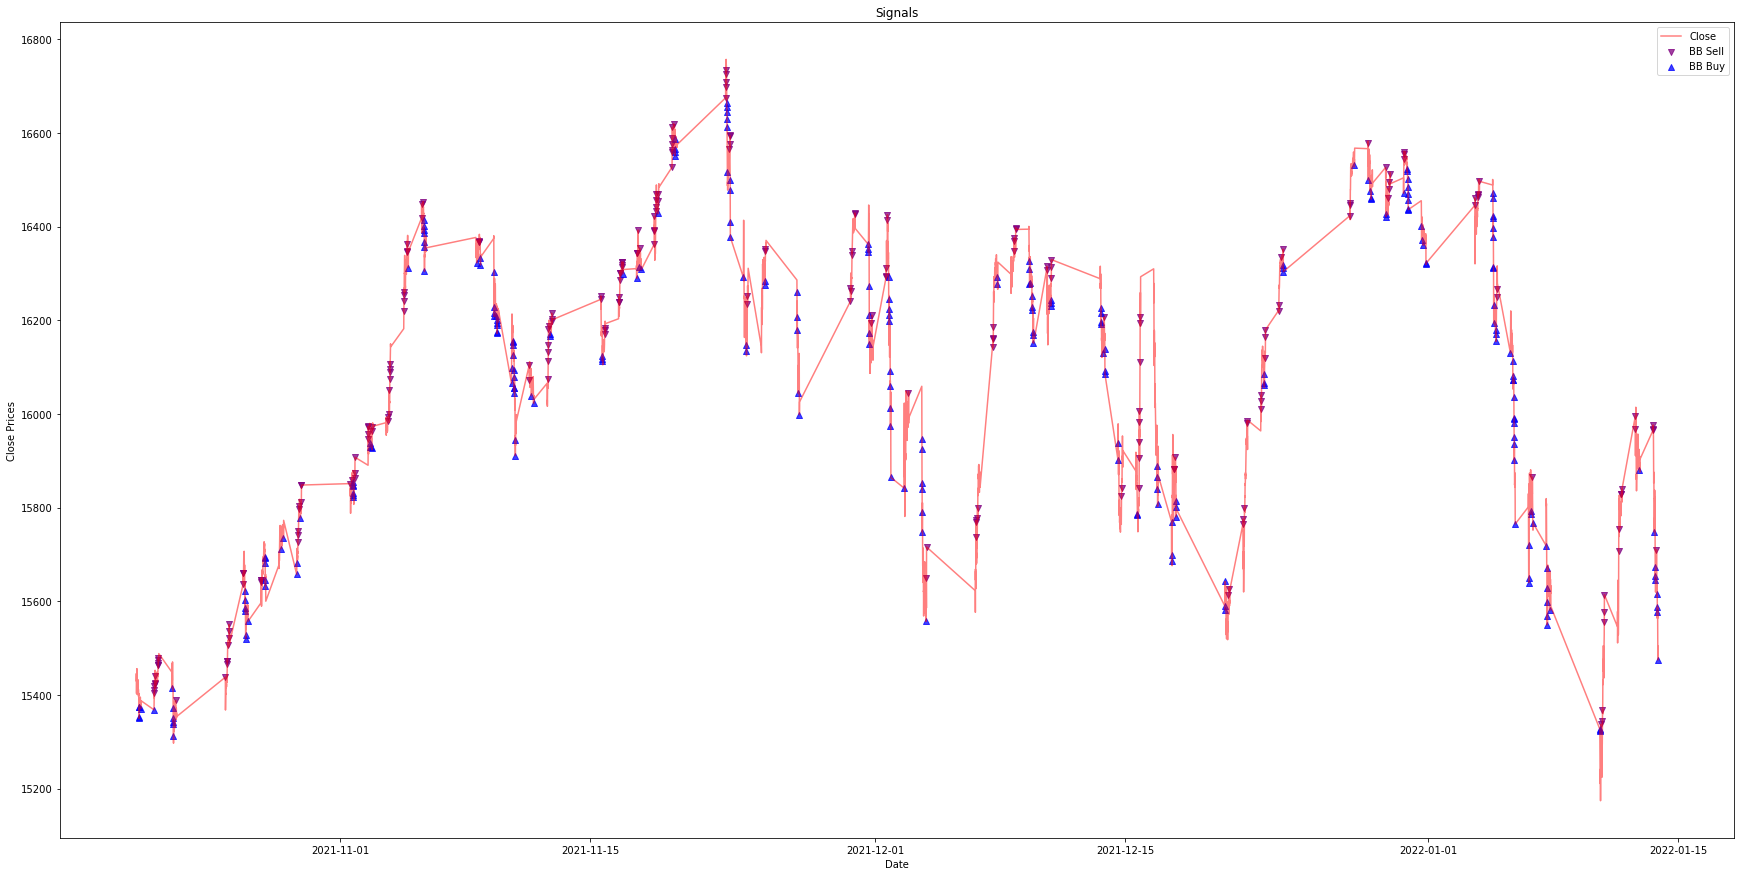

In [58]:
plot_signals(signals_5m_df)

In [84]:
bb_df = TA.BBANDS(nasdaq100_1d_df)
rsi_df = TA.RSI(nasdaq100_1d_df)
d_signals = nasdaq100_1d_df.copy()
d_signals = pd.concat([d_signals, bb_df], axis=1)
d_signals['MFI'] = rsi_df
d_signals

Open          High           Low         Close  \
Date                                                                 
1985-10-01    110.620003    112.160004    110.565002    112.139999   
1985-10-02    112.139999    112.540001    110.779999    110.824997   
1985-10-03    110.839996    111.184998    110.120003    110.870003   
1985-10-04    110.870003    110.870003    109.855003    110.074997   
1985-10-07    110.074997    110.135002    108.175003    108.199997   
...                  ...           ...           ...           ...   
2022-01-07  15774.129883  15835.000000  15526.799805  15592.190430   
2022-01-10  15383.179688  15627.919922  15165.530273  15614.429688   
2022-01-11  15582.719727  15848.559570  15496.910156  15844.120117   
2022-01-12  15955.480469  16017.389648  15815.950195  15905.099609   
2022-01-13  15970.089844  15990.379883  15468.089844  15495.620117   

               Adj Close      Volume      BB_UPPER     BB_MIDDLE  \
Date                                                               
1985-10-01    112.139999   153160000           NaN           NaN   
1985-10-02    110.824997   164640000           NaN           NaN   
1985-10-03    110.870003   147300000           NaN           NaN   
1985-10-04    110.074997   147900000           NaN           NaN   
1985-10-07    108.199997   128640000           NaN           NaN   
...                  ...         ...           ...           ...   
2022-01-07  15592.190430  4229270000  16760.135275  16129.693555   
2022-01-10  15614.429688  5303230000  16756.625430  16093.816016   
2022-01-11  15844.120117  4378660000  16754.067942  16081.894531   
2022-01-12  15905.099609  4321180000  16754.104597  16081.404492   
2022-01-13  15495.620117  4283070000  16755.152584  16041.706006   

                BB_LOWER        MFI  
Date                                 
1985-10-01           NaN        NaN  
1985-10-02           NaN   0.000000  
1985-10-03           NaN   3.554737  
1985-10-04           NaN   2.120675  
1985-10-07           NaN   1.047427  
...                  ...        ...  
2022-01-07  15499.251835  39.369768  
2022-01-10  15431.006601  39.925537  
2022-01-11  15409.721120  45.483788  
2022-01-12  15408.704387  46.888737  
2022-01-13  15328.259428  39.522978  

[9148 rows x 10 columns]

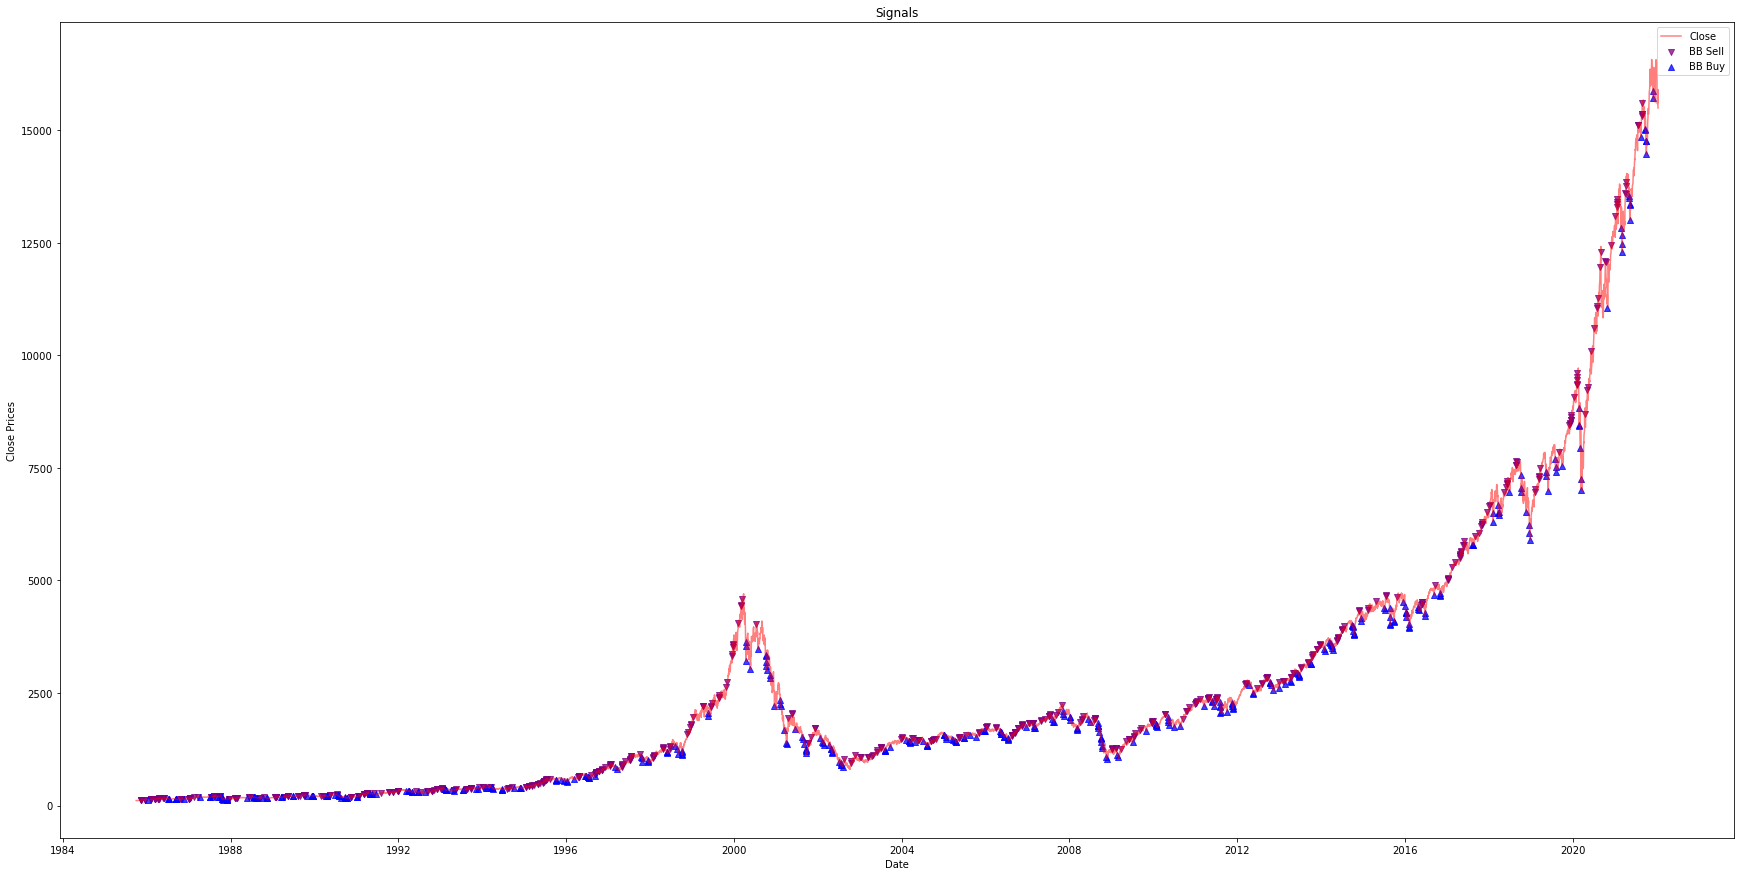

Open          High           Low         Close  \
Date                                                                 
1985-10-01    110.620003    112.160004    110.565002    112.139999   
1985-10-02    112.139999    112.540001    110.779999    110.824997   
1985-10-03    110.839996    111.184998    110.120003    110.870003   
1985-10-04    110.870003    110.870003    109.855003    110.074997   
1985-10-07    110.074997    110.135002    108.175003    108.199997   
...                  ...           ...           ...           ...   
2022-01-07  15774.129883  15835.000000  15526.799805  15592.190430   
2022-01-10  15383.179688  15627.919922  15165.530273  15614.429688   
2022-01-11  15582.719727  15848.559570  15496.910156  15844.120117   
2022-01-12  15955.480469  16017.389648  15815.950195  15905.099609   
2022-01-13  15970.089844  15990.379883  15468.089844  15495.620117   

               Adj Close      Volume      BB_UPPER     BB_MIDDLE  \
Date                                                               
1985-10-01    112.139999   153160000           NaN           NaN   
1985-10-02    110.824997   164640000           NaN           NaN   
1985-10-03    110.870003   147300000           NaN           NaN   
1985-10-04    110.074997   147900000           NaN           NaN   
1985-10-07    108.199997   128640000           NaN           NaN   
...                  ...         ...           ...           ...   
2022-01-07  15592.190430  4229270000  16760.135275  16129.693555   
2022-01-10  15614.429688  5303230000  16756.625430  16093.816016   
2022-01-11  15844.120117  4378660000  16754.067942  16081.894531   
2022-01-12  15905.099609  4321180000  16754.104597  16081.404492   
2022-01-13  15495.620117  4283070000  16755.152584  16041.706006   

                BB_LOWER        MFI  Signal_BB  Signal_MFI  
Date                                                        
1985-10-01           NaN        NaN        0.0         0.0  
1985-10-02           NaN   0.000000        0.0         1.0  
1985-10-03           NaN   3.554737        0.0         1.0  
1985-10-04           NaN   2.120675        0.0         1.0  
1985-10-07           NaN   1.047427        0.0         1.0  
...                  ...        ...        ...         ...  
2022-01-07  15499.251835  39.369768        0.0         0.0  
2022-01-10  15431.006601  39.925537        0.0         0.0  
2022-01-11  15409.721120  45.483788        0.0         0.0  
2022-01-12  15408.704387  46.888737        0.0         0.0  
2022-01-13  15328.259428  39.522978        0.0         0.0  

[9148 rows x 12 columns]

In [86]:
get_bb_signal(d_signals)
get_mfi_signal(d_signals, 80, 20)
plot_signals(d_signals)
d_signals

In [87]:
plot_bb

<function __main__.plot_bb(df)>

In [88]:
def candle_plot(prices):
    #create figure
    plt.figure(figsize=(30, 15))

    #define width of candlestick elements
    width = 1
    width2 = .5

    #define up and down prices
    up = prices[prices.Close>=prices.Open]
    down = prices[prices.Close<prices.Open]

    #define colors to use
    col1 = 'green'
    col2 = 'red'

    #plot up prices
    plt.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1)
    plt.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1)
    plt.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1)

    #plot down prices
    plt.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2)
    plt.bar(down.index,down.High-down.Open,width2,bottom=down.Open,color=col2)
    plt.bar(down.index,down.Low-down.Close,width2,bottom=down.Close,color=col2)

    #rotate x-axis tick labels
    plt.xticks(rotation=45, ha='right')

    #display candlestick chart
    plt.show()

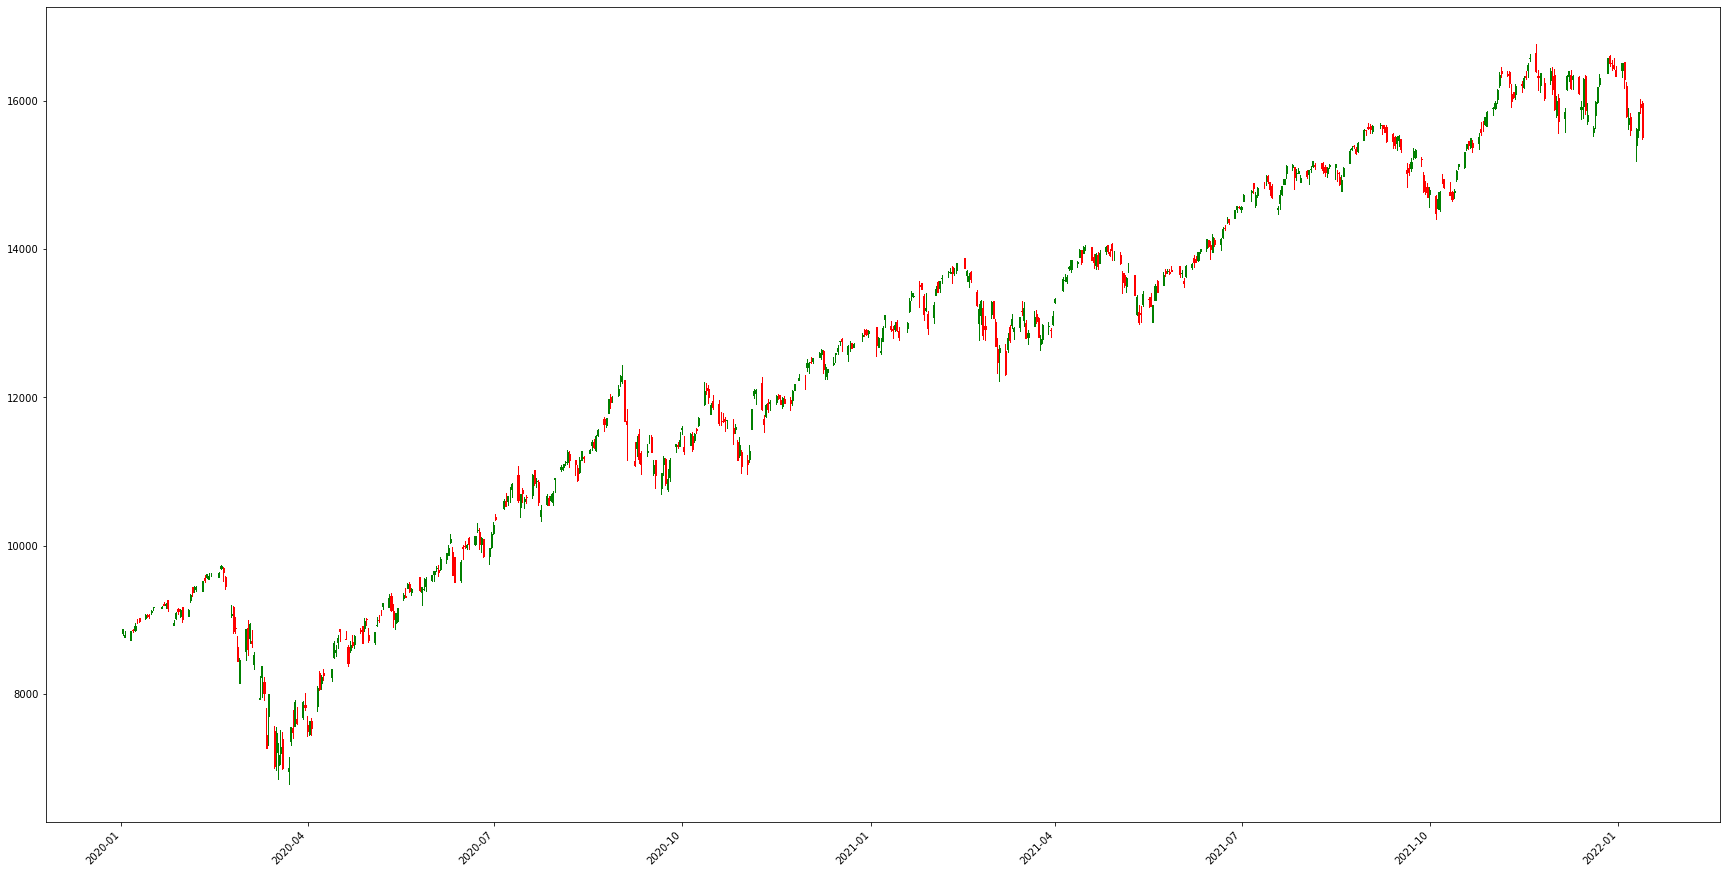

In [75]:
candle_plot(d_signals.loc['2020':])

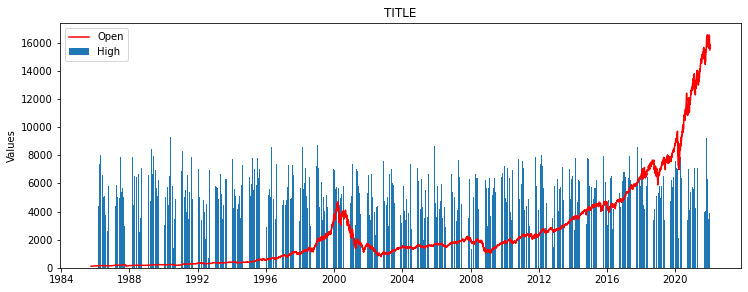

In [83]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(d_signals['Close'], label= 'Close', color='r')
plt.bar(d_signals.index,height=d_signals['MFI']*100, label = 'MFI')
plt.title('TITLE')
plt.ylabel('Values')
plt.legend(d_signals.columns.values, loc='upper left')
plt.show()

In [91]:
def compare_signals(df):
    df['Signal'] = 0.0
    for index, row in df.iterrows():
        if row['Signal_BB'] == row['Signal_MFI']:
            df.loc[index, 'Signal'] = row['Signal_BB']
        else:
            df.loc[index, 'Signal'] = 0.0

In [92]:
compare_signals(d_signals)

In [93]:
d_signals['Signal'].value_counts()

 0.0    9112
-1.0      29
 1.0       7
Name: Signal, dtype: int64

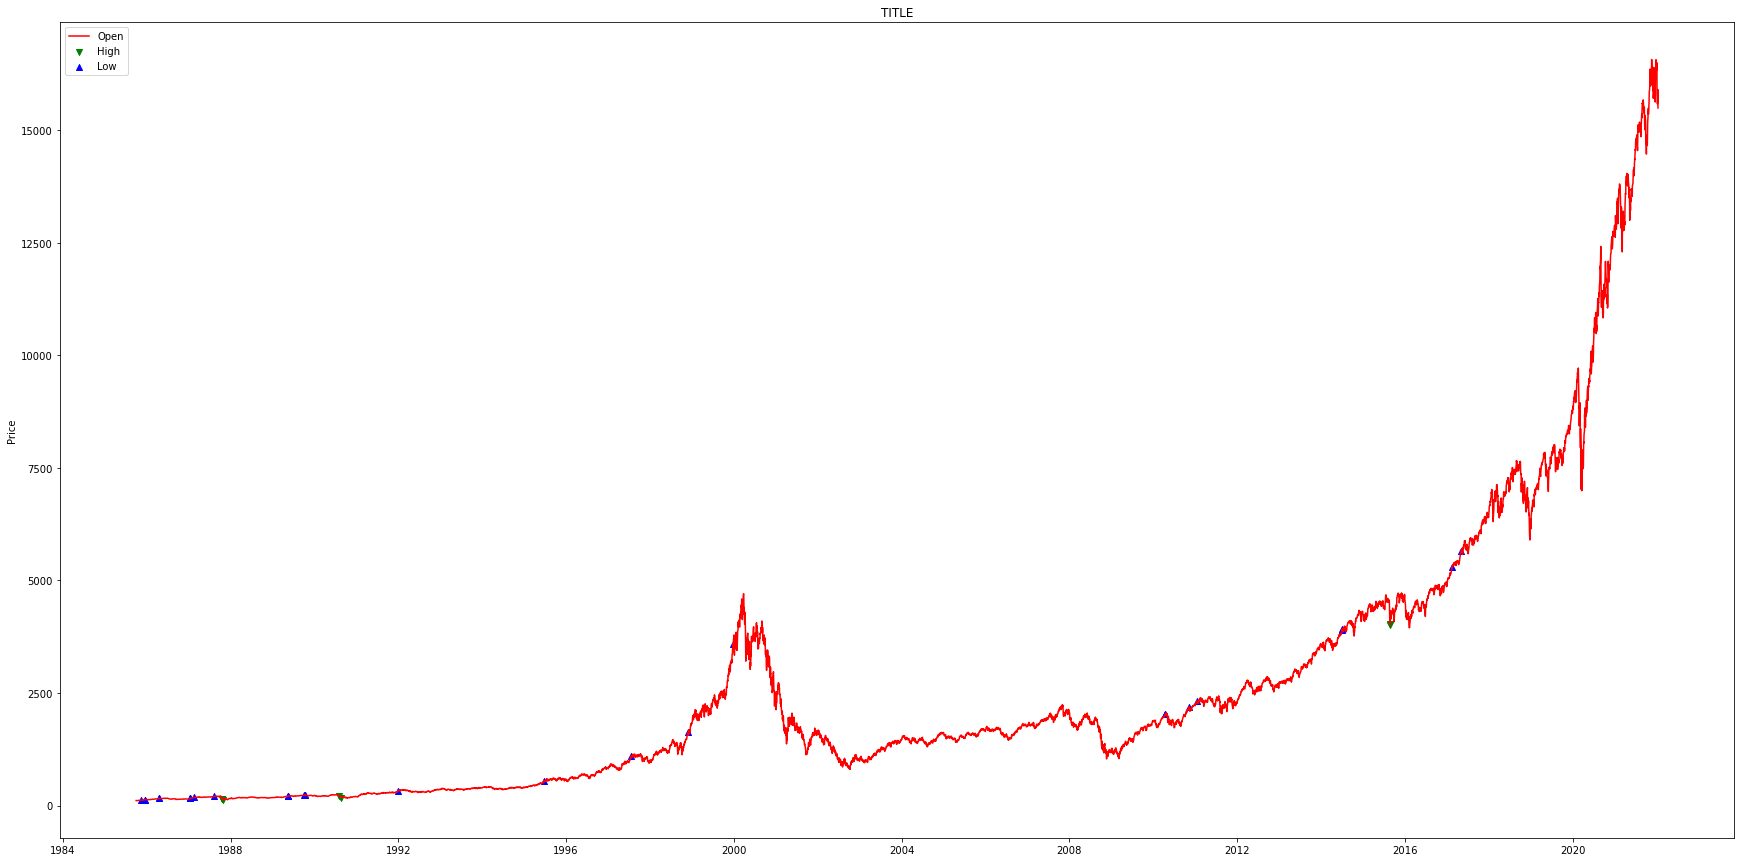

In [100]:
plt.figure(figsize=(30, 15))
plt.plot(d_signals['Close'], color='r', label='Close')
plt.scatter(d_signals.index[d_signals['Signal']==1], d_signals[d_signals['Signal']==1]['Close'], marker='v', color='g')
plt.scatter(d_signals.index[d_signals['Signal']==-1], d_signals[d_signals['Signal']==-1]['Close'], marker='^', color='b')
plt.title('TITLE')
plt.ylabel('Price')
plt.legend(d_signals.columns.values, loc='upper left')
plt.show()